[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/How-to-Learn-to-Code/python-class/blob/master/Lesson_6_NumPy/Lesson_6_NumPy.ipynb)

# Lesson 6: NumPy

## Learning Objectives: 

Students will be introduced to `numpy` and learn to take advantage of its efficient data manipulation and numerical processing. 

* [Introduction to `numpy` and Scientific Computing](#intro)
* [Efficiency of `numpy`](#efficiency)
* [Understanding the `numpy.array`](#array)
* [More NumPy Functions](#functions)
* [In-Class Exercises](#exercises)

Find more details in the [NumPy Documentation](https://numpy.org/doc/stable/reference/index.html)!

### Introduction to `numpy` and Scientific Computing <a id='intro'></a>

The Python package `numpy` is an indespensible tool for efficient data manipulation and numerical processing. 
It is a highly curated and tested collection of functions centered around the manipulation of their proprietary data type, the `numpy.array`. 
The `numpy.array` is similar to the standard `list` type, but it has some important differences that make it particularly useful for generic vector and matrix algebra and element-wise data manipulation.

[NumPy](https://numpy.org/) is the foundational Python package for scientific computing.
Scientific computing encompasses any tools, functions, or algorithms that are used to generate or simulate mathematical models and problems. 
Python in its base form is fine for some data manipulation with support for generic algorithm construction (e.g. loops and function declaration), but as soon as you need to do any mathematics, especially on a large scale (e.g. large data sets), generic Python falls short with respect to efficient built-in functionality.
NumPy is a heavily curated and tested package that contains thousands, if not hundreds of thousands, of useful functions for generic mathematical manipulation of your data.
This includes general mathematics, like the natural logarithm, as well as general statistics, like variance and quantiles.
These included functions are also very efficient with respect to computational time and memory, so they should be used whenever possible.

We'll start by installing the `numpy` package and importing it into our notebook.

In [ ]:
%pip install numpy

In [1]:
# np is the standard abbreviation for numpy
import numpy as np 

### Efficiency of `numpy` <a id='efficiency'></a>

Part of `numpy`'s efficiency comes from the fact that the algorithms used behind the scenes are tuned to be as efficient as possible by dedicated computer scientists.
Another reason that the code is efficient is that large chunks of the code are written in *C* and *C++* rather than in Python.
A pre-compiled *C* or *C++* function is called by NumPy to execute your code, and the results are passed back to you in Python. 
It is not necessarily important to understand why this is more efficient, but it is important to point out that it is done in this manner because it is more efficient than strictly using Python.
They are playing 4-dimensional chess while you are playing checkers, metaphorically, so there is no use in reinventing the wheel with respect to creating homemade functions.

A final reason that NumPy is so efficient is the introduction of the `numpy.array`.
The `numpy.array` is a generic $n$-dimensional array object.
The easiest way to think about it is that a `numpy.array` is an $n$-dimensional matrix which can be used to store and manipulate your data or just do simple matrix and vector algebra.
The reason this object is more efficient than the standard Python `list` is how the memory is stored in each case.
In a standard `list` all of the members are stored in random spots in memory, so when they need to be accessed, the computer has to search around for them.
In a `numpy.array` all of the data points are stored in sequential memory.
This means that if you are at a point in your array, `my_array[a][b][c]`, and want to access the adjacent piece of data, `my_array[a][b][c + 1]`, the computer can just access the adjacent memory address instead of searching through all of the memory for the correct piece of data.
In the previous example, `my_array` designates a 3-dimensional array, as seen by the three different indexes following the `my_array` call.
Most functions in NumPy are built around manipulating these objects and are coded in such a way as to take advantage of the memory allocation in an optimal way, making them very efficient.

In order to demonstrate the power of NumPy, we can start with the standard dot product. In the code block below, we generate two vectors of length 10,000 and store them in `numpy.array` objects and `list` objects. We create a generic function, `my_dot_0`, that takes the dot product of two input vectors using a standard for loop. We then time the output.  

In [2]:
# This example uses the np.random package so setting the seed ensures
# we get the same result every time we run this block.
np.random.seed(5)
        
# Generic function to compute a dot product with any array-like object
def my_dot_0(a0, a1):
    dot = 0
    for i in range(len(a0)):
        dot += a0[i] * a1[i]
    return dot

# Create the vectors as numpy arrays
# np.random.randn gets a sample from the normal distribution with value
# in the parentheses indicating the size of the array you want
A_arr = np.random.randn(10000)
B_arr = np.random.randn(10000)

# Copy the vectors as lists
A_list = list(A_arr)
B_list = list(B_arr)

# %timeit is a built-in Jupyter Notebook function for timing functions easily
# -n 10 is a statement about how many runs it will use for the time output
# tmp is a placeholder variable to prevent output clutter
print("list time for my_dot_0:")
%timeit -n 10 tmp = my_dot_0(A_list, B_list)
print("\nnp.array time for my_dot_0:")
%timeit -n 10 tmp = my_dot_0(A_arr, B_arr)

list time for my_dot_0:
862 μs ± 193 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)

np.array time for my_dot_0:
1.33 ms ± 22.8 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In a surprise result, seemingly contrary to everything previously stated, the `list` manipulation came out faster than the manipulation using the `numpy.array`. 
The caveat is that the `numpy.array` object is built for speed when used with NumPy's built-in functions. 
We can try the test again, but this time we use some built-in functions from NumPy to clean up the function definition and improve our results, hopefully.

In [3]:
# Using built in NumPy functions:
# - np.multiply does element-wise multiplication
# - np.sum adds the elements of the array together 
def my_dot_1(a0, a1):
    return np.sum(np.multiply(a0, a1))

print("list time for my_dot_1:")
%timeit -n 10 tmp = my_dot_1(A_list, B_list)
print("\nnp.array time for my_dot_1:")
%timeit -n 10 tmp = my_dot_1(A_arr, B_arr)

list time for my_dot_1:
728 μs ± 191 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)

np.array time for my_dot_1:
7.28 μs ± 223 ns per loop (mean ± std. dev. of 7 runs, 10 loops each)


That's more like it! 
Notice that the `list` speed sees some improvement using the built in NumPy functions as well, but certainly not as much as the `numpy.array`. 
In general the NumPy functions can handle generic `list` types, but the full potential is unlocked with the `numpy.array` type.
For this final speed test, we can use the the totally pre-built `numpy.dot` function and check out the speed.

In [4]:
print("list time for np.dot:")
%timeit -n 10 tmp = np.dot(A_list, B_list)
print("\nnp.array time for np.dot:")
%timeit -n 10 tmp = np.dot(A_arr, B_arr)

list time for np.dot:
827 μs ± 206 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)

np.array time for np.dot:
The slowest run took 9.53 times longer than the fastest. This could mean that an intermediate result is being cached.
7.02 μs ± 8.07 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Will you look at that! 
The totally pre-built function is even faster than our last test with the two different functions. 
Notice that the `list` test really struggles, comparitively, with this function. 
Together, all of these speed tests should highlight:
1. NumPy functions are very efficient.
2. NumPy functions are relatively easy to use and clean up your code.
3. NumPy functions work best with `numpy.array` objects.
4. If you can find a NumPy function to handle your `numpy.array` objects, you should use it rather than trying to build your own function.

### Understanding the `numpy.array` <a id='array'></a>

Now that we know why we should use the humble `numpy.array`, we should probably learn how to use this object.
As mentioned previously is, it is very similar to your standard `list` with a few built-in features that make it easier to use in a numerical sense.
The first feature is crucial: unlike a `list` all of the rows/columns should have the same length, like any matrix you would normally deal with.
This means that `numpy.array` are best suited for doing data manipulation and calculations on data that would fit into a traditional $n$-dimensional matrix. 
Below is an example of a data set that is fine in a `list` but should be avoided in a `numpy.array`.
Depending on your Python version, it will either throw an error or a warning that this functionality is deprecated (outdated, no longer supported).

In [5]:
my_list = [[0, 1, 1], [2, 3]]
print(my_list)
my_matrix = np.array(my_list)

[[0, 1, 1], [2, 3]]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

Now that we know what data works best in a `numpy.array`, we can look into how to build these arrays.
First, we will look at a few different ways to make a 2x3x3 matrix that is filled with 0s.

1. We can use `np.zeros` to create an array of 0s with the shape you specify.

In [6]:
a0 = np.zeros((2, 3, 3))

2. We can create one directly from a list of lists. (This can be difficult to read and error prone.)

In [7]:
a1 = np.array([[[0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0]]])

3. We create one from a list of 0s and then reshape it to the shape we want. (This is also error prone.)

In [8]:
a2 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
a2 = a2.reshape((2, 3, 3)) 

Let's use the built-in `shape` attribute of the arrays to check their dimensions.

In [9]:
print(f'a0 shape = {a0.shape}, a1 shape = {a1.shape}, a2 shape = {a2.shape}')

a0 shape = (2, 3, 3), a1 shape = (2, 3, 3), a2 shape = (2, 3, 3)


We can use the `ndim` attribute to check the number of dimensions of an array.

In [10]:
print(f'The above arrays have dimension {a0.ndim}.')

The above arrays have dimension 3.


Another useful function is `np.arange`, which is similar to the built-in `range` function in Python, but it returns a `numpy.array` instead of a `list`.

In [11]:
a3 = np.arange(12)
a3

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

As we saw earlier, `reshape` function is useful for changing the shape of an array. It changes the array by filling each row with the data until it is full, then moving to the next row.

In [12]:
a3 = a3.reshape((3, 4))
a3

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

The `np.linspace` function is useful for creating an array of evenly spaced numbers over a specified interval. The function takes three arguments: the start of the interval, the end of the interval, and the number of points to generate. Unlike `np.arange`, the `np.linspace` function includes the end of the interval in the array.

In [13]:
a4 = np.linspace(0, 1, 5)
a4

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

### More NumPy Functions <a id='functions'></a>

At some point, it might also be helpful to sort data within an array, find specific instances of things within an array, delete rows or columns, or add data. 
This can all be done using NumPy's built-in functions as well. 
In the following examples, we will try to use NumPy to manipulate a data set in a way that would be potentially be useful for your own data. 
We can also run some simple statistics for fun!

First, let's generate a 5x30 array full of normally distributed random numbers:

In [22]:
a0 = np.random.randn(5, 30)

And then pretend that one of the data points was missing, or NaN (Not a Number):

In [23]:
a0[3][5] = np.nan

Often we'll want to be able to find that Nan value and replace it with something else.
A useful function will be `np.isnan` that returns an array of the same size but with all NaN set to `True` and everything else set to `False`.
`np.where` generates a tuple of arrays that show where the `True`s are located. The first array in the tuple is the row index and the second array is the column index.


In [24]:
where_nan = np.where(np.isnan(a0))
where_nan

(array([3]), array([5]))

You can also use `np.where` with any generic conditional statement to find the locations of the `True` values:

In [25]:
where_negative = np.where(a0 < 0.)
where_negative

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4]),
 array([ 0,  3,  4,  6,  7,  9, 13, 14, 15, 19, 20, 25, 26, 28, 29,  0,  3,
         5,  6, 10, 12, 13, 16, 18, 19, 23, 26, 29,  2,  3,  4,  5,  6,  8,
         9, 17, 18, 21, 23, 24, 27,  2,  3,  6,  7,  9, 10, 13, 15, 16, 18,
        19, 20, 21, 22, 24, 25, 28,  0,  4,  5,  6,  7,  8,  9, 10, 11, 12,
        13, 20, 21, 22, 23, 26]))

We could print out the ordered pairs of where the NaNs are located:

In [26]:
for i in range(len(where_nan[0])):
    print('The location of the NaN is', (where_nan[0][i], where_nan[1][i]), '\n')

the location of the NaN is (3, 5) 



Since the NaN would mess up our data and subsequent calculations, we may want to delete the row it is located in:

In [27]:
row_delete = np.delete(a0, where_nan[0], 0)

Similarly, we could remove the column instead

In [28]:
col_delete = np.delete(a0, where_nan[0], 1)

Another common approach is to replace the NaN with specific value, often 0. We'll use `np.where` again to help us with this. Unlike the previous `np.where` usage, we can also use it do a replacement. Here we tell NumPy to create an array with the same size as `a0`; but wherever `a0` has a NaN, we replace it with 0, and everywhere else we keep the original value.

In [30]:
replace_nan = np.where(np.isnan(a0), 0., a0)

Let's plot some of the data we generated. We'll use the `matplotlib` package to do this. (You'll get a more in-depth look at `matplotlib` in the next lesson.)
First, we install and import the package.

In [31]:
%pip install matplotlib
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


Let's plot the distribution of the 2nd and 4th rows. We'll extract the rows using standard indexing and take the transpose of the data so that the `plt.hist` function will read the data correctly

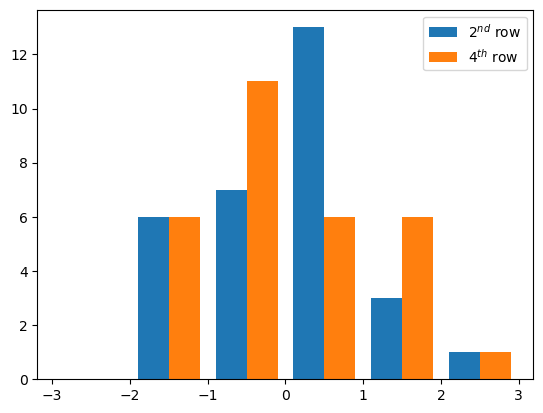

In [32]:
# First argument is the data, second argument is the bins
hist = plt.hist(np.transpose(replace_nan[[1, 3]]), [-3, -2, -1, 0, 1, 2, 3])
plt.legend(["$2^{nd}$ row", "$4^{th}$ row"])

We can also compute the mean and variance as well to see if it matches the expected values (0 and 1, respectively).

In [34]:
mean = np.mean(replace_nan[[1 ,3]], axis=1)
variance = np.var(replace_nan[[1, 3]], axis=1)
rows = [2, 4]
for i in range(2):
    print(f'row {rows[i]}: mean = {mean[i]:.5f} and variance = {variance[i]:.5f}')

row 2: mean = 0.02816 and variance = 0.95992
row 4: mean = -0.07265 and variance = 0.95477


### In-Class Exercises <a id='exercises'></a>

In these exercises, we will walk through some of the stuff we have covered previously and introduce some new helper functions that should be useful for most people.

Let's pretend that we are sampling our data every 0.01 s between 0.0 s and 1.0 s. This makes time independent variable space. Create a `numpy.array` that represents the time data `t`.

In [36]:
t = np.linspace(0., 1., 101) 

Now that we have generated our independent variable, we can specify what we expect dependent variable to look like. 
In our case, let's pretend our dependent variable is expected position, *y*, given a time value, *t*, from our time domain and is modelled as:
$$y = 0.5 e^{t^2} + 1.5$$
Create a `numpy.array` that represents this expected position data `y_expected`.

In [37]:
y_expected = 0.5 * np.exp(t ** 2) + 1.5

We can plot the expected position data using `matplotlib`.

Text(0, 0.5, 'Position')

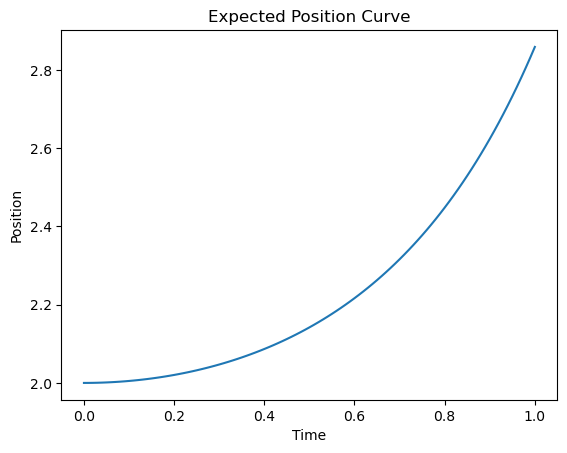

In [39]:
# Plot expected curve
fig = plt.plot(t, y_expected)
plt.title('Expected Position Curve')
plt.xlabel('Time')
plt.ylabel('Position')

Now that we have our expected value, we can simulate noise in our data. 
We will do this through introducing random values such that the average should replicate our data.
Below we have *N* represent the normal distribution.
Use the following transformation to transform the output of `np.random.randn` (a standard normal N(mean=0, var=1)) to the correct Normal distribution space:
$$N'(\mu, \sigma^2) = \mu + \sigma * N(0, 1)$$

We will generate 50 random samples of the same length as our *t* vector using:
$$t_{rand} = t * N_{mult}(\mu = 1, \sigma^2 = 0.001) + N_{add}(\mu = 0, \sigma^2 = 0.005)$$

First create N_mult and N_add using `np.random.randn` and the transformation above.

In [40]:
# Create the two random arrays of shape 50 x length of the time domain
N_mult = np.sqrt(0.001) * np.random.randn(50, 101) + 1.
N_add = np.sqrt(0.005) * np.random.randn(50, 101)

Now create the random time data `t_rand` using the formula above.

In [41]:
# The linear transformation of a * t + b, but using the appropriate NumPy syntax
t_rand = np.multiply(t, N_mult) + N_add

Now that we have our random time data, we can generate our random position data `y_rand` using the same formula as before:
$$y_{rand} = 0.5 e^{t_{rand}^2} + 1.5$$

In [42]:
y_rand = 0.5 * np.exp(t_rand ** 2) + 1.5

Find the mean, max, and min of the random position data at each time step. Hint: use the appropriate NumPy functions and `axis=0` argument.

In [43]:
y_avg = np.mean(y_rand, axis=0)
y_max = np.max(y_rand, axis=0)
y_min = np.min(y_rand, axis=0)

Text(0.5, 1.0, 'Expected and Random Position Curves')

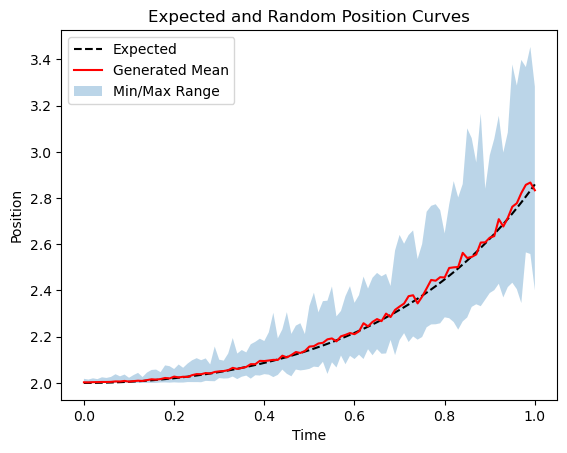

In [51]:
# This will plot the random generated data
fig = plt.plot(t, y_expected, 'k--', t, y_avg, 'r')
plt.fill_between(t, y_min, y_max, alpha=0.3)
plt.legend(['Expected', 'Generated Mean', 'Min/Max Range'], loc='upper left')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Expected and Random Position Curves')

Let's pretend that the 8th and 23rd sampled time series were done by a trainee that had set the sample frequency to be a little too slow. Remove these two samples from the data set.

In [60]:
y_data = np.delete(y_rand, [7, 22], axis=0)
print(f'The number of samples left after removing the bad trainee data is: {y_data.shape[0]}.')

The number of samples left after removing the bad trainee data is: 48.


Pretend that we're also limited by our instruments in that they are unreliable when the position is greater than 3.25. Remove any samples that reached more than 3.25 at any time in the experiment.

In [61]:
unreliable_idx = np.where(y_data > 3.25)
y_data = np.delete(y_data, unreliable_idx[0], axis = 0)
print(f'The number of samples left after removing the data with position > 3.25 is: {y_data.shape[0]}.')

The number of samples left after removing the data with position > 3.25 is: 38.


Let's replot the data to see how it looks now.

Text(0.5, 1.0, 'Expected and Filtered Position Curves')

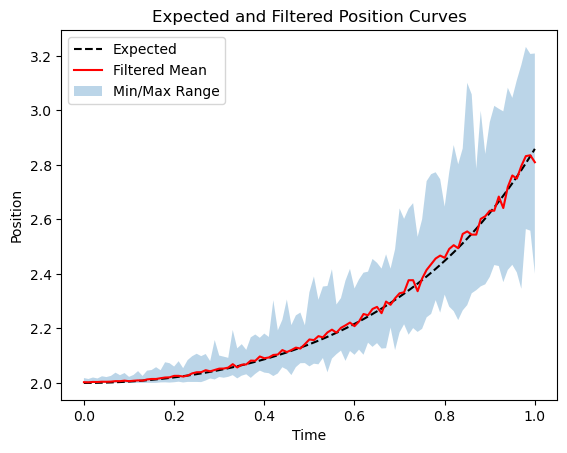

In [62]:
y_max = np.max(y_data, axis=0)
y_min = np.min(y_data, axis=0)
y_avg = np.mean(y_data, axis=0)
fig = plt.plot(t, y_expected, 'k--', t, y_avg, 'r')
plt.fill_between(t, y_min, y_max, alpha = 0.3)
plt.legend(['Expected', 'Filtered Mean', 'Min/Max Range'], loc='upper left')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Expected and Filtered Position Curves')

Here is a website that goes through a good sample of [NumPy problems](https://www.w3schools.com/python/numpy/numpy_exercises.asp). 
It covers some functions that this lesson did not explicitly cover as this lesson tried to introduce some more advanced attributes of NumPy that might be immediately relevant for your data processing.